- Clustering is example of unsupervised learning, where we we work with completely unlabeled data.

## 1. The Idea
- It involved grouping of data based on one attribute
- To identify patterns of data and make informed decisions
- key idea:
  > 1. Distance (measured using Euclidean distance) and Similarity(points closer to each other are similar)
  > 2. No Predefined labels (clusters are determined purely on inherent properties of data)
  > 3. No correct clustering (different methods may produce different clusters, useful for different purposes)
  > 4. Cluster interpretation (is based on analyst, he only labels them too)

- Application?
  > 1. Marketing (customers with similar purchasing behavious)
  > 2. Helthcare ( patiets with similar history)
  > 3. Urban planning (like residential areas, commercial hubs, traffic pattern etc.)

## 2. The model

- Consider each input to a cluster has d-dimensions (e.g. 2d datapoints (x,y))
- We will represent these inputs as List[Vector]

- Example:
  > 1. Blog Post Titles(Each blog post title can be represented as a numeric vector. Clustering can group similar posts to understand user interests)
  > 2. Image Colors(Given an image with thousands of colors, clustering can help reduce it to a limited number of colors for printing, minimizing color error)

### 2.1 k-means clustering

#### (a) Steps
1. Initialization: Start with k random points (as initial means/centroid) in the d-dimensional space. 
2. Assignment: Assign each data point to the closest mean.
3. Update: Recompute the means based on the assigned points.
4. Repeat: Repeat the assignment (step 2) and update (step 3)steps until no point's assignment changes.

#### (b) Implementation
- Easy using vector_mean (check linear_algebra)
1. **Helper function to meausre how many coordinates differ in each update**
   - Why needed? - So, that we can find when to stop (when there is no change in elements of consecutive updates)
   - Continue reading to understand how it will be useful

In [1]:
from scratch.linear_algebra import Vector

def num_differences(v1: Vector, v2: Vector) -> int: # v1 is old assignment and v2 is new assignment vector
    assert len(v1) == len(v2) 
    return len([x1 for x1, x2 in zip(v1, v2) if x1 !=x2])

assert num_differences([1,2,3], [2,2,4]) == 2
assert num_differences([1, 2], [1, 2]) == 0


2. **Cluster mean function**
   - Initially when no cluster - assign random means
   - why needed? - to Recompute Means/centroids and to handle empty clusters.

In [2]:
from typing import List
from scratch.linear_algebra import vector_mean

def cluster_means(k: int, 
                  input: List[Vector],
                  assignments: List[int]) -> List[Vector]: # assignments are first assigned randomly
    """ Finds mean of inputs with same assignments in k clusters  
    """
    # Assign datapoints to clusters
    clusters = [[] for i in range(k)] 
    for input, assignment in zip(input, assignments):
        clusters[assignment].append(input)
    
    # Find mean of each cluster
    # Assign random mean for empty cluster 
    return [vector_mean(cluster) if cluster else random.choice(inputs) 
            for cluster in clusters]
                  

3.  **KMeans clusterer**
   - Initialize k clusters
   - Based on initial means classify the inputs
   - define train function
   - use tqdm to track progress
   - use itertools to track number of iterations because we will choose infine iterations till a condition is met

In [3]:
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k # number of clusters
        self.means = None # means of clusters

    def classify(self, input: Vector) -> int:  # Assignment for each datapoint
        """
        Return index of cluster closest to input
        """
        return min(range(self.k), key=lambda i: squared_distance(input, self.means[i]))

    # Training gives us final assignment list
    def train(self, inputs: List[Vector]) -> None: 

        # Assign random assignments of cluster to each input point in inputs List
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            
            for _ in t:
                # Compute means and find new assignemnts
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
        
                # Check how many assignments changed and if we are done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
                assignments = new_assignments   
                t.set_description(f" {num_changed=}/{len(inputs)=}")

## Example: Meetups

Problem:
1. Goal is to organize meetups for users
2. The location of meetups can be three only based on budged (later reduced to two)
3. So, we need to cluster our users in meetup location near to them, for their convenience


User location data:
1. 2D points of their location (lattitute and longitute)

Applying k-Means clustering:

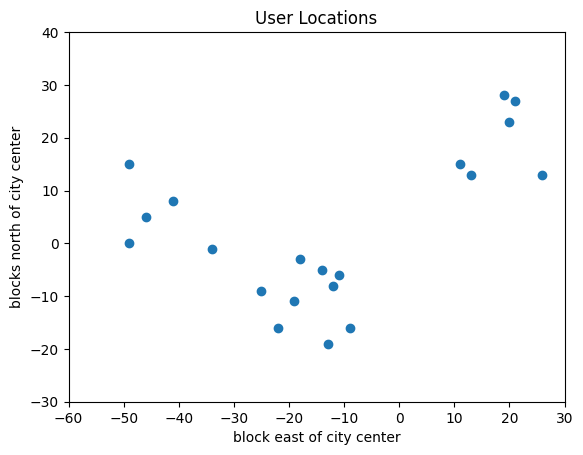

In [4]:
# Let'visualize our lacation data

from typing import List
from matplotlib import pyplot as plt

inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],
                                 [-9,-16],[21,27],[-49,15],[26,13],
                                 [-46,5],[-34,-1],[11,15],[-49,0],
                                 [-22,-16],[19,28],[-12,-8],[-13,-19],
                                 [-41,8],[-11,-6],[-25,-9],[-18,-3]]


x = [input_x for input_x, _ in inputs]
y = [input_y for _, input_y in inputs]

plt.scatter(x,y)
plt.xlabel('block east of city center')
plt.ylabel('blocks north of city center')
plt.title('User Locations')
plt.xlim(-60, 30)
plt.ylim(-30, 40)
plt.show()

- Its 2D data, so we can distinguish it into 2 or 3 clusters visually.
- But as dimensions increase, its difficult to identify by seeing it.

In [5]:
import random
random.seed(12)
clusterer = KMeans(k=3)
tr=clusterer.train(inputs)
means = sorted(clusterer.means)
assign = [clusterer.classify(input) for input in inputs]
assert len(means) == 3
zip_input = zip(inputs, assign)
print([i for i in zip_input])

 num_changed=5/len(inputs)=20: : 1it [00:00, 2221.56it/s]

[([-14, -5], 2), ([13, 13], 1), ([20, 23], 1), ([-19, -11], 2), ([-9, -16], 2), ([21, 27], 1), ([-49, 15], 0), ([26, 13], 1), ([-46, 5], 0), ([-34, -1], 0), ([11, 15], 1), ([-49, 0], 0), ([-22, -16], 2), ([19, 28], 1), ([-12, -8], 2), ([-13, -19], 2), ([-41, 8], 0), ([-11, -6], 2), ([-25, -9], 2), ([-18, -3], 2)]


input: [[-14, -5], [13, 13], [20, 23], [-19, -11], [-9, -16], [21, 27], [-49, 15], [26, 13], [-46, 5], [-34, -1], [11, 15], [-49, 0], [-22, -16], [19, 28], [-12, -8], [-13, -19], [-41, 8], [-11, -6], [-25, -9], [-18, -3]]
cluster 0 x,y = [(-49, 15), (-46, 5), (-34, -1), (-49, 0), (-41, 8)]
cluster 1 x,y = [(13, 13), (20, 23), (21, 27), (26, 13), (11, 15), (19, 28)]
cluster 2 x,y = [(-14, -5), (-19, -11), (-9, -16), (-22, -16), (-12, -8), (-13, -19), (-11, -6), (-25, -9), (-18, -3)]


Text(0, 0.5, 'blocks north of city center')

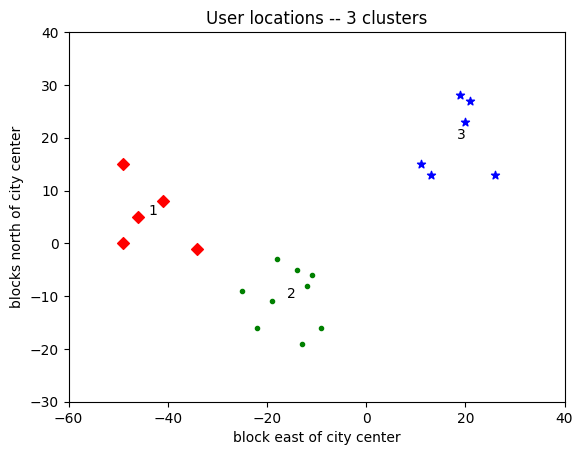

In [6]:
assign = [clusterer.classify(input) for input in inputs] # Cluster assignments

x = [input_x  for input_x, _ in inputs] 
y = [input_y for _, input_y in inputs] 

print(f"input: {inputs}")

z = ['red','blue', 'green']  # Colors for each cluster
m = ['D', '*', '.' ]  # Marker for each cluster

assert len(x) == len(y) == len(assign)

# For each cluster assign unique marker and color
for cluster in range(max(assign)+1):
    cluster_x = [x[i] for i in range(len(x)) if assign[i]==cluster]
    cluster_y = [y[i] for i in range(len(y)) if assign[i]==cluster]
    points = zip(cluster_x,cluster_y)
    points_list = [point for point in points]
    print(f"cluster {cluster} x,y = {points_list}")
    plt.scatter(cluster_x, cluster_y, c=z[cluster], marker=m[cluster])
    plt.text(means[cluster][0],means[cluster][1], cluster+1)

# Some display settings
plt.xlim(-60, 40)
plt.ylim(-30, 40)
plt.title('User locations -- 3 clusters')
plt.xlabel('block east of city center')
plt.ylabel('blocks north of city center')

In [7]:
# Now if we have budget for only two meetups

random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)
assert len(means) == 2
assert squared_distance(means[0], [-26,-5]) < 1
assert squared_distance(means[1], [18,20]) < 1

 num_changed=4/len(inputs)=20: : 2it [00:00, 1546.57it/s]


input: [[-14, -5], [13, 13], [20, 23], [-19, -11], [-9, -16], [21, 27], [-49, 15], [26, 13], [-46, 5], [-34, -1], [11, 15], [-49, 0], [-22, -16], [19, 28], [-12, -8], [-13, -19], [-41, 8], [-11, -6], [-25, -9], [-18, -3]]
cluster 0 x,y = [(13, 13), (20, 23), (21, 27), (26, 13), (11, 15), (19, 28)]
cluster 1 x,y = [(-14, -5), (-19, -11), (-9, -16), (-49, 15), (-46, 5), (-34, -1), (-49, 0), (-22, -16), (-12, -8), (-13, -19), (-41, 8), (-11, -6), (-25, -9), (-18, -3)]


Text(0, 0.5, 'blocks north of city center')

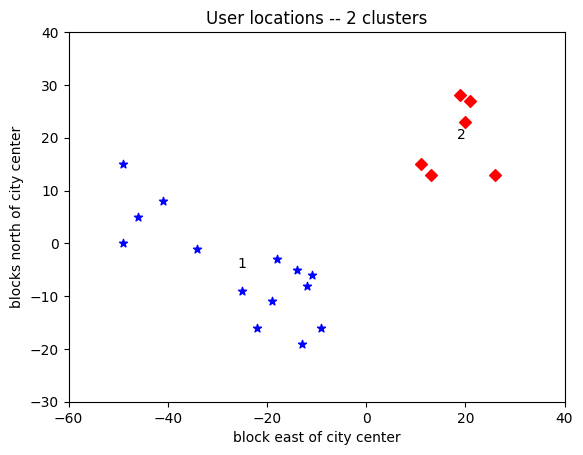

In [8]:
# Plot

assign = [clusterer.classify(input) for input in inputs] # Cluster assignments

x = [input_x  for input_x, _ in inputs] 
y = [input_y for _, input_y in inputs] 

print(f"input: {inputs}")

z = ['red','blue', 'green']  # Colors for each cluster
m = ['D', '*', '.' ]  # Marker for each cluster

assert len(x) == len(y) == len(assign)

# For each cluster assign unique marker and color
for cluster in range(max(assign)+1):
    cluster_x = [x[i] for i in range(len(x)) if assign[i]==cluster]
    cluster_y = [y[i] for i in range(len(y)) if assign[i]==cluster]
    points = zip(cluster_x,cluster_y)
    points_list = [point for point in points]
    print(f"cluster {cluster} x,y = {points_list}")
    plt.scatter(cluster_x, cluster_y, c=z[cluster], marker=m[cluster])
    plt.text(means[cluster][0],means[cluster][1], cluster+1) 

# Some display settings
# plt.text(-30, -10, '1')
# plt.text(18,20, '2')
plt.xlim(-60, 40)
plt.ylim(-30, 40)
plt.title('User locations -- 2 clusters')
plt.xlabel('block east of city center')
plt.ylabel('blocks north of city center')

## Choosing k

- There various ways to choose k, out of it we have <u> **Elbow Method** </u>

- We plot sum of squared errors (SSE) for different values of k and look for the point where the SSE (sum of squared error) begins to decrease at a slower rate, forming an "elbow." 
  
- This point is typically considered the optimal k.

- Let's plot the SSE wrt k:
  

0it [00:00, ?it/s]
 num_changed=8/len(inputs)=20: : 1it [00:00, 1718.27it/s]
 num_changed=2/len(inputs)=20: : 2it [00:00, 1370.91it/s]
 num_changed=1/len(inputs)=20: : 3it [00:00, 1182.05it/s]
 num_changed=5/len(inputs)=20: : 2it [00:00, 2107.69it/s]
 num_changed=4/len(inputs)=20: : 2it [00:00, 1784.05it/s]
 num_changed=2/len(inputs)=20: : 2it [00:00, 1387.92it/s]
 num_changed=1/len(inputs)=20: : 3it [00:00, 1094.55it/s]
 num_changed=1/len(inputs)=20: : 3it [00:00, 1792.18it/s]
 num_changed=2/len(inputs)=20: : 2it [00:00, 2024.77it/s]
 num_changed=7/len(inputs)=20: : 2it [00:00, 1414.13it/s]
 num_changed=1/len(inputs)=20: : 4it [00:00, 1072.99it/s]
 num_changed=3/len(inputs)=20: : 3it [00:00, 2118.69it/s]
 num_changed=2/len(inputs)=20: : 6it [00:00, 1772.62it/s]
 num_changed=1/len(inputs)=20: : 3it [00:00, 1045.27it/s]
 num_changed=2/len(inputs)=20: : 4it [00:00, 1795.31it/s]
 num_changed=3/len(inputs)=20: : 2it [00:00, 1510.64it/s]
 num_changed=2/len(inputs)=20: : 4it [00:00, 1481.43i

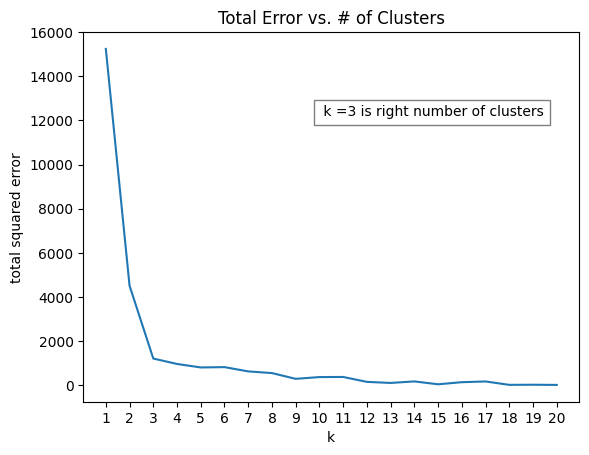

In [9]:
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """
    finds the total squared error from k-means clustering the inputs
    """
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]
    return sum(squared_distance(input, means[cluster]) for input, cluster in zip(inputs, assignments))

# Now lets plot k vs SSE

ks = range(1, len(inputs)+1)  # max k could be 20 for 20 datapoints data, i.e. 1 point in each cluster
errors = [squared_clustering_errors(inputs, k) for k in ks]
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
description_text = " k =3 is right number of clusters"
plt.text(len(inputs) * 0.5, max(errors) * 0.8, description_text, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))
plt.show()


## Example: Clustering colors

- We will use a task here where we need to reduce the number of colors in an image using k-means clustering.
  
- It is useful when we want to simplify an image with limited color palette (in printer e.g.)
  
- For a 2D Image- it is a tensor of [rows of pixel, columns of pixels, color channels] shape
  > Pixels : which are 2D   
  > Each pixel has colors: 3D (RGB)
  
- We will choose five colors
- Apply kmeans to all the pixels of image and assign them in these five color clusters
- Recolor pixels with their cluster color

- To load image using matplotlib we need **pillow library**


In [16]:
image_path = r"leaf.jpeg"
import matplotlib.image as mpimg
img = mpimg.imread(image_path)/256  # Rescale between 0 and 1
                                    # Behind the scene - img is a numpy array

assert len(img) == 339 # number of pixel in row
assert len(img[0]) == 509 # number of pixel in column
assert len(img[0][0]) == 3 # number of elements in each pixel (RGB)

# To understand
top_row = img[0] 
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

# Flattened list of all pixels
# tolist() coverts Numpy array to python list
pixels = [pixel.tolist() for row in img for pixel in row]

# Feed to our clusterer

clusterer = KMeans(5)
clusterer.train(pixels)


 num_changed=1/len(inputs)=172551: : 54it [00:36,  1.47it/s]    


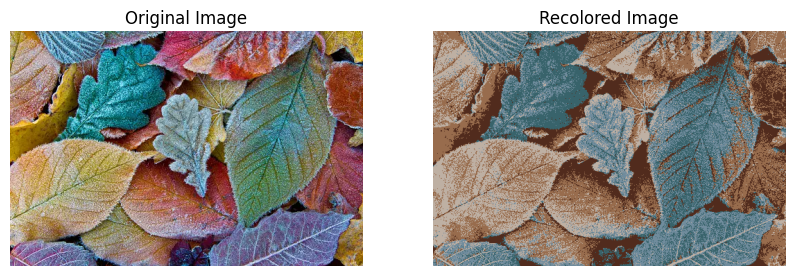

In [17]:
# Construct new image with same format

def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)  # index of closest cluster assignment
    return clusterer.means[cluster]      # mean of the respective cluster

new_image = [[recolor(pixel) for pixel in row ]
              for row in img]
# display img

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.imshow(img)
ax2.imshow(new_image)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original Image')
ax2.set_title('Recolored Image')
plt.show()

In [18]:
# lets check with a color palette image

image_path = r"color_palette.jpeg"
palette = mpimg.imread(image_path)/256

# flatten pixel array

pixels = [pixel.tolist() for row in palette for pixel in row]
clusterer = KMeans(k=3)
clusterer.train(pixels)

 num_changed=340/len(inputs)=266900: : 2it [00:01,  1.01it/s]   


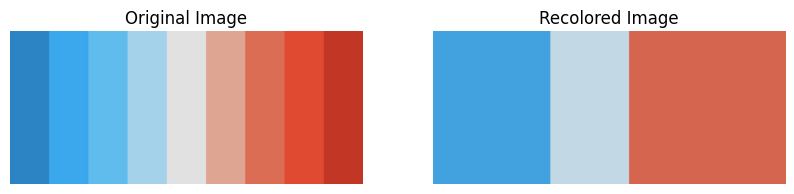

In [19]:
new_palette = [[recolor(pixel) for pixel in row]
               for row in palette]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.imshow(palette)
ax2.imshow(new_palette)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original Image')
ax2.set_title('Recolored Image')
plt.show()

## Hierarchical Clustering

- To find natural groupings within a dataset based on their features.
  
- We don't know number of clusters in advance.
  
- It produces a **Dendogram** - tree-like structure that shows how clusters are formed step-by-step
  > Useful to visualize complex datasets.

- Types of Hierarchical Clustering  
>1. Agglomerative (Bottom-Up):
>- Start with each element in their own group. 
>- Repeatedly merge the two most similar groups until everyone is in a single group.
>- {a}, {b}, {c}, {d} -> {a,b}, {c},{d} -> {a,b,c}, {d} -> {a,b,c,d}

    >2. Divisive (Top-Down):
    >- Start with all elements in one big group. 
    >- Repeatedly split the least similar groups until everyone is in their own group.
    >- {a, b, c, d} -> {a,b,c},{d} -> {a,b}, {c}, {d} -> {a}, {b}, {c}, {d}


## Bottom-Up Hierarchical Clustering
1. Make each input its own cluster of one. ({a}, {b}, {c}, {d})2. As long as there are multiple clusters remaining, find the two closest clusters and merge them.({a,b}, {c,d} -> {a,b,c,d})
3. In the end we will have ONE giant cluster.
4. We can track the merge order and create any number of clusters we want by just unmerging.
   > - e.g. if we want three clusters, we can just undo the last two merges.
   > - i.e. final cluster was = {a,b,c,d}
   > - Undo once = {a,b, c}, {d}
   > - Undo once more = {a,b},{c},{d} = 3 clusters

In [41]:
from typing import NamedTuple, Union

class Leaf(NamedTuple):     # Leaf = cluster containing single data point
    value: Vector           # value stores the data point itself which is a Vector type

leaf1 = Leaf([10, 20])      # Two Leaf instances as example
leaf2 = Leaf([30, -15])

In [42]:
class Merged(NamedTuple):   # Merged = cluster formed by merging two child clusters
    children: tuple         # children contains two clusters that were merged
    order: int              # Track order in which merge occured to track sequence of merges

merged = Merged((leaf1, leaf2), order = 1)  # Instance of Merged as Example

Cluster = Union[Leaf, Merged]  # Cluster can be Leaf or Merged instance for uniform handling of input (as leaf or merged) 

merged

Merged(children=(Leaf(value=[10, 20]), Leaf(value=[30, -15])), order=1)

- This is another case where Python’s type annotations have let us down.
- You’d like to type hint Merged.children as Tuple[Cluster, Cluster] but mypy doesn’t allow recursive types like that.

In [52]:
# Helper functions

# 1. To get all values merged in a cluster

# In a cluster all values are arranged in a dendogram form
# We need to get them in flattened list format

def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]                     # If cluster has single vector children

    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]    # If cluster contains multiple child clusters 
                                                   # Then ietrate over each child
                                                   # And return flat List of all vectors 


assert get_values(merged) == [[10, 20], [30, -15]]

In [56]:
# 2. Calculate distance between vectors of clusters
# Define Distance function by your own : min/max/avg

from typing import Callable
from scratch.linear_algebra import distance

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:  # min is default function if not given = min(v1, v2)
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)    # For each v1
                         for v2 in get_values(cluster2)])  # It will iterate over each v2 
                                                           # Thus all combinations
                        


In [58]:
# 3. Tracking merge order 
# Since Leaf has no .order property

def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf') # was never merged
                            # Since Leaf clusters were never merged, 
                            # we’ll assign them infinity, the highest possible value.
    else:
        return cluster.order

In [59]:
# 4. Leaf clusters don’t have children, we’ll create and add a helper function for that

from typing import Tuple
def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

In [63]:
# Let's create the clustering algo

def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)

    # as long as we have more than one cluster left
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
            for i, cluster1 in enumerate(clusters)
            for cluster2 in clusters[:i]),
            key=pair_distance)
        
        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]
        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))
        # and add their merge
        clusters.append(merged_cluster)
    
    # when there's only one cluster left, return it
    return clusters[0]
        
        

In [68]:
inputs = [
    [19, 28],
    [21, 27],
    [20, 23],
    [26, 13],
    [11, 15],
    [13, 13],
    [-49, 0],
    [-46, 5],
    [-41, 8],
    [-49, 15],
    [-34, 1],
    [-22, -16],
    [-19, -11],
    [-25, -9],
    [-11, -6],
    [-12, -8],
    [-14, 5],
    [-18, -3],
    [-13, -19],
    [-9, -16]
]


base_cluster = bottom_up_cluster(inputs)
print([base_cluster])
len(base_cluster)

[Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-46, 5]), Leaf(value=[-49, 0])), order=13), Leaf(value=[-41, 8])), order=11), Leaf(value=[-34, 1])), order=5), Leaf(value=[-49, 15])), order=4), Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-12, -8]), Leaf(value=[-11, -6])), order=17), Leaf(value=[-18, -3])), order=9), Merged(children=(Merged(children=(Leaf(value=[-19, -11]), Leaf(value=[-22, -16])), order=12), Leaf(value=[-25, -9])), order=10)), order=8), Merged(children=(Leaf(value=[-9, -16]), Leaf(value=[-13, -19])), order=14)), order=7), Leaf(value=[-14, 5])), order=6)), order=1), Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[21, 27]), Leaf(value=[19, 28])), order=18), Leaf(value=[20, 23])), order=15), Leaf(value=[26, 13])), order=3), Merged(children=(Leaf(value=[13, 13]), Leaf(value=[11, 15])), order=16)), order=2)), order=0)]


2

In [70]:
def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]
    
    # as long as we don't have enough clusters yet...

    while len(clusters) < num_clusters:
    # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        #remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))
    # once we have enough clusters...
    return clusters

In [71]:
three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster,3)]

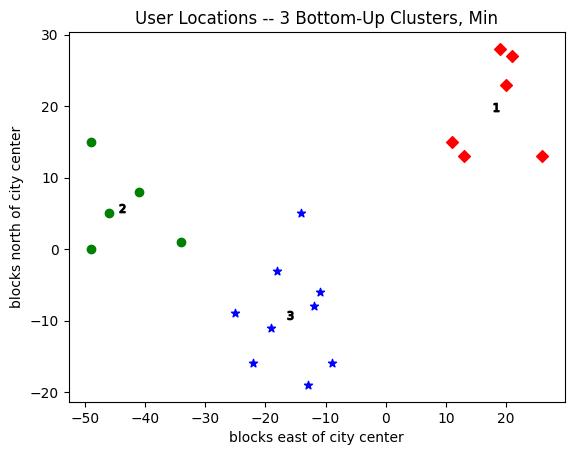

In [73]:
for i, cluster, marker, color in zip([1, 2, 3],three_clusters,['D','o','*'],['r','g','b']):
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')
plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()